降维算法
核心技术 $\rightarrow$矩阵分解
pca 不可解释

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target


In [3]:
X.shape

(150, 4)

In [4]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
pca = PCA(n_components=2)
X_dr= pca.fit_transform(X)

In [7]:
X_dr.shape

(150, 2)

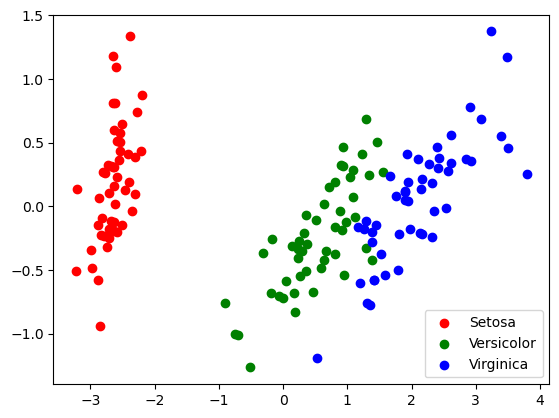

In [30]:
# 可视化降维结果
# 取出三种不同的鸢尾花数据
setosa = X_dr[y == 0]
versicolor = X_dr[y == 1]
virginica = X_dr[y == 2]
# 绘制散点图
plt.scatter(setosa[:, 0], setosa[:, 1], color='r', label='Setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color='g', label='Versicolor')
plt.scatter(virginica[:, 0], virginica[:, 1], color='b', label='Virginica')
# 添加图例
plt.legend()
# 设置通明度
plt.alpha = 0.7
# 显示图形
plt.show()

In [12]:
# 降维后信息量大小
pca.explained_variance_

array([4.22824171, 0.24267075])

In [13]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [14]:
pca_line = PCA().fit(X)
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

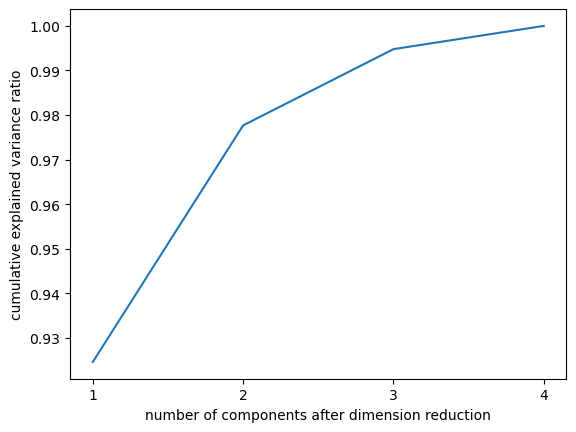

In [18]:
# 绘图
import  numpy as np
np.cumsum(pca_line.explained_variance_ratio_)
plt.plot([1, 2, 3, 4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
plt.show()

In [19]:
# 最大似然估计自选超参数  比较费算力
pca_mle = PCA(n_components='mle')
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)

In [20]:
X_mle.shape

(150, 3)

In [21]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267246

In [25]:
# 按信息量百分比自选超参数
pca_f = PCA(n_components=0.99, svd_solver='full')
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)

In [26]:
X_f

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [27]:
pca_f.explained_variance_ratio_.sum()

0.9947878161267246

svd ——奇异值分解
pca ——主成分分析


In [29]:
PCA(2).fit(X).components_.shape

(2, 4)